<a href="https://colab.research.google.com/github/dharanija14/Speech-Emotion-Recognition/blob/master/Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Dataset

/content/drive/My Drive/Dataset


In [ ]:
!ls


angry  disgust	fear  happy  neutral  sad  surprise


In [ ]:

import os

import librosa

import librosa.display

import IPython.display as ipd
from IPython.display import Image

% pylab inline
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D 
from keras.layers import Flatten, Dropout, Activation 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [ ]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Dataset1/angry/YAF_back_angry.wav')

ipd.Audio('/content/drive/My Drive/Dataset1/angry/YAF_back_angry.wav')

In [ ]:
len(data)

44689

In [ ]:
sampling_rate

22050

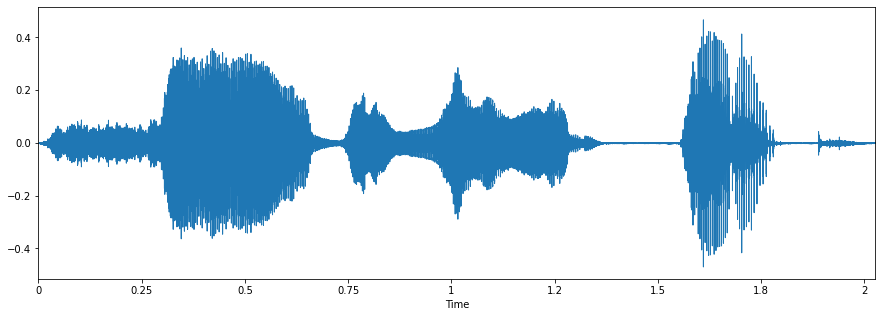

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
dataset_path = os.path.abspath('/content/drive/My Drive/Dataset1')
destination_path = os.path.abspath('./')

randomize = True

split = 0.8

sampling_rate = 20000 
emotions=["angry","disgust","fear","happy","neutral", "sad", "surprise"]


In [ ]:
destination_path


'/content/drive/My Drive/Dataset'

In [ ]:
import sys
import csv
import librosa
import numpy as np
import pandas as pd


def create_meta_csv(dataset_path,destination_path) :

#Change dataset path accordingly
  DATASET_PATH=os.path.abspath(dataset_path)
  csv_path=os.path.join(destination_path, "dataset attr.csv")

  flist = []
  emotions= ["angry", "disqust", "fear", "happy", "neutral", "sad", "surprise"]
  for root, dirs, files in os.walk(DATASET_PATH, topdown=False):
    for name in files:
      if (name.endswith(".wav")):
        fullName = os.path.join( root,name)
        flist.append(fullName)

  split_format = str('/') 
  filenames=[]
  for idx, file in enumerate(flist):
    filenames.append(file.split (split_format) )
    #print(filenanes[idx])

  f(filenames,flist)

  if destination_path == None:
    destination_path = DATASET_PATH
  return True




In [ ]:
def f(filenames,flist):
  types=[]
  
  for idx,path in enumerate(filenames) :
    types.append( (flist[idx],emotions.index(path[-2])))
  with open(os.path.join(destination_path, "dataset_attr.csv"),'w') as f:
    writer = csv.writer(f)
    writer.writerows([("path","label")])
    writer.writerows(types)
    f.close()

In [ ]:
def create_and_load_meta_csv_df(dataset_path, destination_path, randomize = True, split = None):
  if(create_meta_csv(dataset_path, destination_path=destination_path)):
    dframe = pd.read_csv(os.path.join(destination_path, "dataset_attr.csv"))

#shuffle if randomize 1s True or if split specified and randomize is not specified
#so default behavior is split
  if randomize == True or (split != None and randomize == None):

  #shuffle the dataframe here

    dframe=dframe.sample(frac=1).reset_index(drop=True)
    pass

  if split != None:
    train_set, test_set = train_test_split(dframe, split)
    return dframe, train_set, test_set

  return dframe

def train_test_split(dframe, split_ratio):
  train_data = dframe.iloc[ :int((split_ratio)*len(dframe)), :]
  test_data = dframe.iloc[int((split_ratio) * len(dframe)):,:]
  test_data=test_data.reset_index(drop=True)
  return train_data, test_data

if __name__ == "__main__":
  dataset_path = os.path.dirname(os.getcwd())+'/Dataset'
  print("dataset_path : ", dataset_path)
  destination_path = os.getcwd()
  classes = 7
  total_ros= 2556
  randomize = True
  clear = True

df, trn_df, tst_df = create_and_load_meta_csv_df(dataset_path, destination_path=destination_path, randomize=randomize,split=0.9)

print (df.count())
print(trn_df.count())
print(tst_df.count())

dataset_path :  /content/drive/My Drive/Dataset
path     1400
label    1400
dtype: int64
path     1260
label    1260
dtype: int64
path     140
label    140
dtype: int64


In [ ]:
df = pd.read_csv("dataset_attr.csv")

In [ ]:
df

,path,label
0,/content/drive/My Drive/Dataset/surprise/YAF_b...,6
1,/content/drive/My Drive/Dataset/surprise/YAF_b...,6
2,/content/drive/My Drive/Dataset/surprise/YAF_b...,6
3,/content/drive/My Drive/Dataset/surprise/YAF_b...,6
4,/content/drive/My Drive/Dataset/surprise/YAF_b...,6
...,...,...
1395,/content/drive/My Drive/Dataset/happy/YAF_yout...,3
1396,/content/drive/My Drive/Dataset/happy/YAF_yes_...,3
1397,/content/drive/My Drive/Dataset/happy/YAF_whea...,3
1398,/content/drive/My Drive/Dataset/happy/YAF_wash...,3


In [ ]:
df, train_df, test_df = create_and_load_meta_csv_df(dataset_path, destination_path, randomize, split=0.9)

In [ ]:
print("Actual Audio : ", df['path'][0])
print("Labels       : ", df['label'][0])


Actual Audio :  /content/drive/My Drive/Dataset/fear/YAF_walk_fear.wav
Labels       :  2


In [ ]:
unique_labels = train_df.label.unique()
unique_labels.sort()
print("unique labels in Emtion dataset : ")
print(*unique_labels, sep=', ')
unique_labels_counts = train_df.label.value_counts(sort=False)
print("\n\nCount of unique labels in Emtion dataset : ")
print(*unique_labels_counts,sep=', ')

unique labels in Emtion dataset : 
0, 1, 2, 3, 4, 5, 6


Count of unique labels in Emtion dataset : 
180, 179, 184, 178, 173, 182, 184


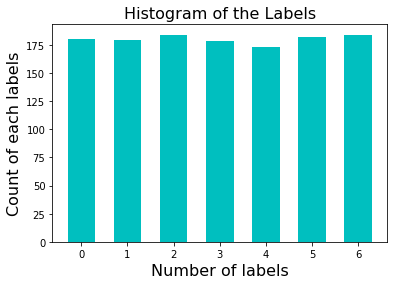

In [ ]:
# Histogram of the classes
plt.bar(unique_labels, unique_labels_counts,align = 'center', width=0.6, color = 'c')
plt.xlabel('Number of labels', fontsize=16)
plt.xticks(unique_labels)
plt.ylabel('Count of each labels', fontsize=16)
plt.title('Histogram of the Labels', fontsize=16)
plt.show()

In [ ]:
 
import librosa
import pandas as pd
import numpy as np
 
def get_audio_features(audio_path, sanpling_rate):
  X,sample_rate=librosa.load(audio_path ,res_type="kaiser_fast", duration=2.5, sr=sampling_rate*2, offset=0.5)
 
  sample_rate=np.array(sample_rate)
 
  y_harmonic, y_percussive = librosa.effects.hpss(X)
 
  pitches,magnitudes=librosa.core.pitch.piptrack(y=X, sr=sample_rate)
  mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate, n_mfcc=13) , axis=1)
  pitches=np.trim_zeros(np.mean(pitches,axis=1)) [:20]
  magnitudes = np.trim_zeros(np.mean(magnitudes,axis=1)) [:20]
  C = np.mean(librosa.feature.chroma_cqt(y=y_harmonic, sr=sampling_rate),axis=1)
  return [mfccs,pitches,magnitudes,C]
 
def get_features_dataframe(dataframe,sampling_rate):
 
  labels=pd.DataFrame(dataframe["label"])
 
  features = pd.DataFrame(columns=["mfcc", "pitches", "magnitudes", "C"])
  for index, audio_path in enumerate(dataframe["path"]):
    features.loc[index] = get_audio_features(audio_path,sampling_rate)
 
  mfcc = features.mfcc.apply(pd.Series)
  pit = features.pitches.apply(pd.Series)
  mag = features.magnitudes.apply(pd.Series)
  C = features.C.apply(pd.Series)
 
  combined_features = pd.concat([mfcc,pit,mag,C],axis=1,ignore_index=True)
 
  return combined_features,labels

In [ ]:
 
trainfeatures, trainlabel = get_features_dataframe(train_df, sampling_rate)
testfeatures, testlabel = get_features_dataframe(test_df, sampling_rate)

In [ ]:
!ls

angry  dataset_attr.csv  disgust  fear	happy  neutral	sad  surprise


In [ ]:
trainfeatures.shape

(1260, 65)

In [ ]:
trainfeatures = trainfeatures.fillna(0)
testfeatures = testfeatures.fillna(0)

In [ ]:
# By using .ravel() : Converting 2D to 1D e.g. (512,1) -> (512,). To prevent DataConversionWarning

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel).ravel()
X_test = np.array(testfeatures)
y_test = np.array(testlabel).ravel()


In [ ]:
y_train

array([2, 3, 5, ..., 1, 4, 4])

In [ ]:
y_train[:5]

array([2, 3, 5, 4, 4])

In [ ]:
# One-Hot Encoding
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape

(1260, 65, 1)

In [ ]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(x_traincnn.shape[1],x_traincnn.shape[2])))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 65, 256)           1536      
_________________________________________________________________
activation_1 (Activation)    (None, 65, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 65, 128)           163968    
_________________________________________________________________
activation_2 (Activation)    (None, 65, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 65, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 128)           

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=100, validation_data=(x_testcnn, y_test))

Train on 1260 samples, validate on 140 samples
Epoch 1/100
1260/1260 [==============================] - 4s 3ms/step - loss: 2.0061 - accuracy: 0.2960 - val_loss: 1.3498 - val_accuracy: 0.7000
Epoch 2/100
1260/1260 [==============================] - 3s 3ms/step - loss: 1.2548 - accuracy: 0.6500 - val_loss: 1.0027 - val_accuracy: 0.8286
Epoch 3/100
1260/1260 [==============================] - 3s 3ms/step - loss: 0.9441 - accuracy: 0.8103 - val_loss: 0.7886 - val_accuracy: 0.8429
Epoch 4/100
1260/1260 [==============================] - 3s 3ms/step - loss: 0.7337 - accuracy: 0.8770 - val_loss: 0.6233 - val_accuracy: 0.9143
Epoch 5/100
1260/1260 [==============================] - 3s 3ms/step - loss: 0.5752 - accuracy: 0.9143 - val_loss: 0.5121 - val_accuracy: 0.9071
Epoch 6/100
1260/1260 [==============================] - 3s 3ms/step - loss: 0.4590 - accuracy: 0.9222 - val_loss: 0.4256 - val_accuracy: 0.9429
Epoch 7/100
1260/1260 [==============================] - 3s 3ms/step - loss: 0.3797

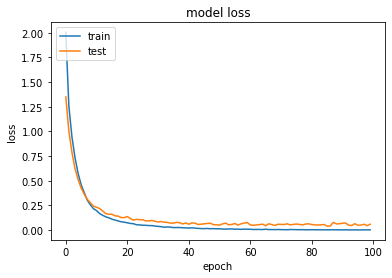

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_name = 'Speech_Emotion_detection.h5'
save_dir = os.path.join(os.getcwd())

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Dataset/Speech_Emotion_detection.h5 


In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:

from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("/content/drive/My Drive/Dataset1/Speech_Emotion_detection.h5")
print("Loaded model from disk")
 

loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 100.00%


In [ ]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

140/140 [==============================] - 0s 811us/step


In [ ]:
preds

array([[1.96148348e-10, 6.04942763e-10, 3.22263141e-08, 1.30275324e-09,
        1.00000000e+00, 5.49006283e-12, 3.56219676e-09],
       [9.99883056e-01, 4.71840794e-05, 1.27609019e-05, 5.72536101e-06,
        4.65050150e-08, 4.20774777e-05, 9.17811576e-06],
       [2.50166719e-04, 1.65442703e-03, 2.30570549e-06, 2.38118773e-05,
        1.08980416e-08, 9.98044610e-01, 2.46759264e-05],
       [8.88506065e-07, 4.69715451e-06, 8.56608509e-08, 3.93597293e-06,
        5.40016138e-08, 9.99987602e-01, 2.72586158e-06],
       [7.80092796e-06, 4.20094093e-09, 9.99947309e-01, 3.51000454e-05,
        2.13394591e-09, 4.66127679e-13, 9.86128816e-06],
       [1.19395205e-03, 9.47754800e-01, 5.91490418e-03, 1.52733049e-03,
        2.23883831e-07, 2.02156225e-04, 4.34066355e-02],
       [8.97894914e-09, 2.89894324e-12, 9.99996424e-01, 2.94808251e-06,
        4.19551338e-11, 7.98328487e-17, 5.81996289e-07],
       [2.30130738e-07, 5.43872545e-07, 3.65709610e-07, 6.17860542e-06,
        6.07271744e-08, 9

In [ ]:
preds1=preds.argmax(axis=1)

In [ ]:
preds1

array([4, 0, 5, 5, 2, 1, 2, 5, 2, 0, 6, 4, 2, 3, 4, 1, 2, 0, 3, 2, 6, 3,
       6, 5, 0, 1, 6, 3, 4, 3, 3, 1, 5, 3, 4, 1, 6, 4, 4, 3, 3, 3, 6, 2,
       6, 0, 5, 3, 4, 0, 2, 3, 4, 5, 6, 5, 4, 2, 2, 1, 1, 0, 5, 0, 0, 1,
       3, 4, 3, 1, 5, 0, 4, 1, 2, 5, 2, 4, 3, 0, 4, 2, 3, 2, 4, 5, 5, 1,
       6, 4, 6, 1, 0, 0, 4, 3, 5, 3, 6, 3, 0, 5, 0, 4, 6, 6, 0, 1, 4, 0,
       4, 1, 0, 5, 3, 4, 1, 2, 6, 4, 0, 4, 4, 3, 1, 4, 6, 5, 1, 6, 2, 5,
       1, 4, 1, 1, 3, 0, 1, 4])

In [ ]:
abc = preds1.astype(int).flatten()

In [ ]:
predictions = (lb.inverse_transform((abc)))

In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10] 

,predictedvalues
0,4
1,0
2,5
3,5
4,2
5,1
6,2
7,5
8,2
9,0


In [ ]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,4
1,0
2,5
3,5
4,2
5,1
6,2
7,5
8,2
9,0


In [ ]:
finaldf = actualdf.join(preddf)

In [ ]:
finaldf[130:140]

,actualvalues,predictedvalues
130,2,2
131,5,5
132,1,1
133,4,4
134,1,1
135,1,1
136,3,3
137,0,0
138,1,1
139,4,4


In [ ]:
finaldf.to_csv('Predictions.csv', index=False)

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  with open('audio.wav','wb') as f:
    f.write(b)
  get_emo('audio.wav')

In [ ]:

def get_emo(demo_audio_path):

  demo_mfcc, demo_pitch, demo_mag, demo_chrom = get_audio_features(demo_audio_path,sampling_rate)

  mfcc = pd.Series(demo_mfcc)
  pit = pd.Series(demo_pitch)
  mag = pd.Series(demo_mag)
  C = pd.Series(demo_chrom)
  demo_audio_features = pd.concat([mfcc,pit,mag,C],ignore_index=True)

  demo_audio_features= np.expand_dims(demo_audio_features, axis=0)
  demo_audio_features= np.expand_dims(demo_audio_features, axis=2)

  

  livepreds = loaded_model.predict(demo_audio_features, 
                         batch_size=32, 
                         verbose=1)

  

  index = livepreds.argmax(axis=1).item()
  

  print(emotions[index])

In [ ]:
record()

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 2ms/step
happy
